# 太陽の黒点の分析

kaggleの黒点予測コンペ

In [56]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [57]:
sns.set()

### 波形データを切る

https://www.kaggle.com/robervalt/sunspots　からデータをダウンロードしておく

In [58]:
_df = pd.read_csv('C:/kaggle/sunspots/Sunspots.csv')


In [59]:
_df

,Unnamed: 0,Date,Monthly Mean Total Sunspot Number
0,0,1749-01-31,96.7
1,1,1749-02-28,104.3
2,2,1749-03-31,116.7
3,3,1749-04-30,92.8
4,4,1749-05-31,141.7
...,...,...,...
3230,3230,2018-03-31,2.5
3231,3231,2018-04-30,8.9
3232,3232,2018-05-31,13.2
3233,3233,2018-06-30,15.9


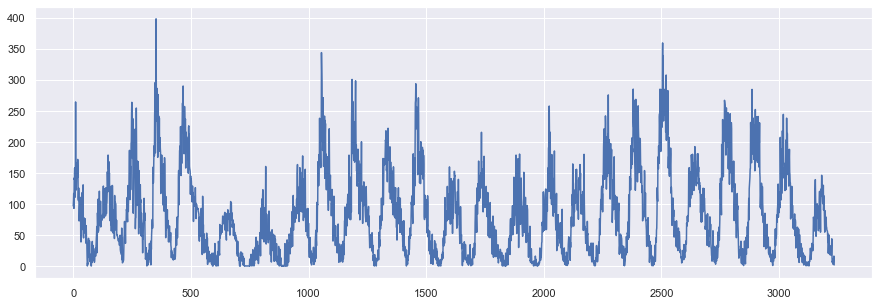

In [60]:
_df["Monthly Mean Total Sunspot Number"].plot(figsize=(15,5))

移動平均はrolling関数で実装

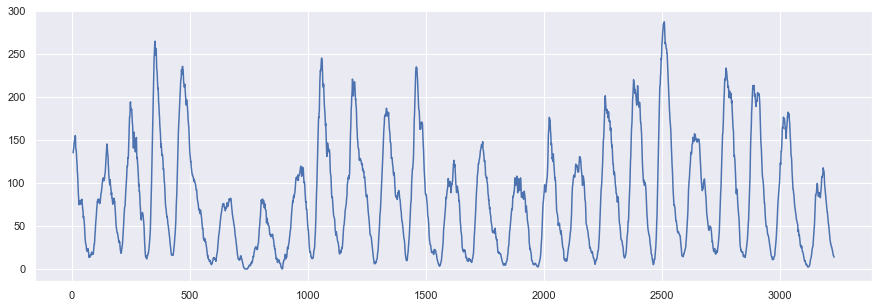

In [61]:
_df["Monthly Mean Total Sunspot Number"].rolling(12,center=True).mean().plot(figsize=(15,5))

In [62]:
_df["ma_24"] = _df["Monthly Mean Total Sunspot Number"].rolling(24,center=True).mean()

In [63]:
_df["ma_24"] 

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
3230   NaN
3231   NaN
3232   NaN
3233   NaN
3234   NaN
Name: ma_24, Length: 3235, dtype: float64

極小値を取得

In [64]:
from scipy import signal
_min_index = signal.argrelmin(_df["ma_24"].values,order=24)
#_min_index = signal.argrelmin(_df["Monthly Mean Total Sunspot Number"].values,order=12)

C:\Users\kenji\anaconda3\lib\site-packages\scipy\signal\_peak_finding.py:77: RuntimeWarning: invalid value encountered in less
  results &= comparator(main, plus)
C:\Users\kenji\anaconda3\lib\site-packages\scipy\signal\_peak_finding.py:78: RuntimeWarning: invalid value encountered in less
  results &= comparator(main, minus)


In [65]:
_min_index

(array([  82,  204,  319,  425,  589,  738,  887, 1016, 1139, 1287, 1419,
        1557, 1686, 1833, 1967, 2091, 2218, 2343, 2464, 2591, 2725, 2846,
        2971, 3116], dtype=int64),)

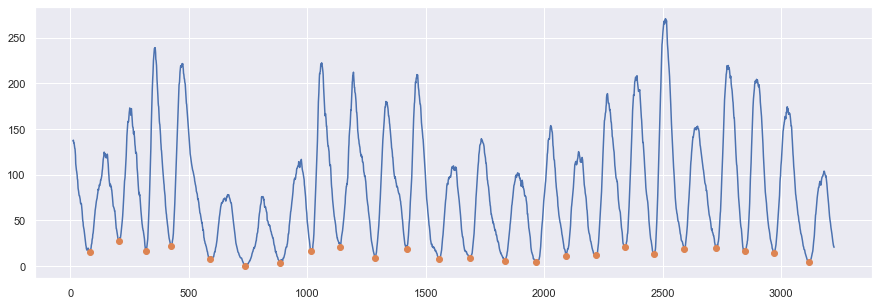

In [66]:
_df["ma_24"].plot(figsize=(15,5))
plt.plot(_df.loc[_min_index].index,_df.loc[_min_index]["ma_24"],'o')

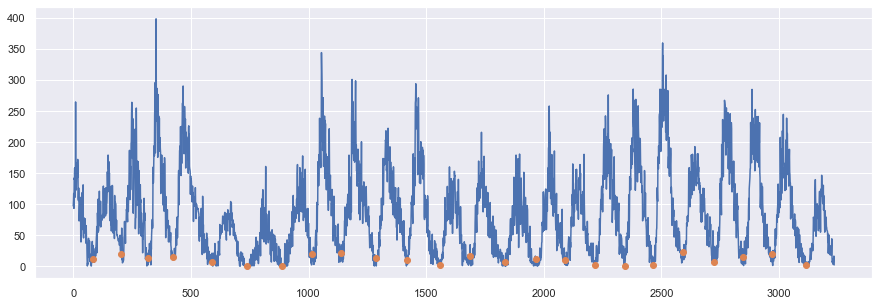

In [67]:
_df["Monthly Mean Total Sunspot Number"].plot(figsize=(15,5))
plt.plot(_df.loc[_min_index].index,_df.loc[_min_index]["Monthly Mean Total Sunspot Number"],'o')

### フラグ作成

周期ごとに切り取りたい。そのためフラグを作成する。

In [68]:
_df["min_flag"] = 0
_df["min_flag"].loc[_min_index] = 1

C:\Users\kenji\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


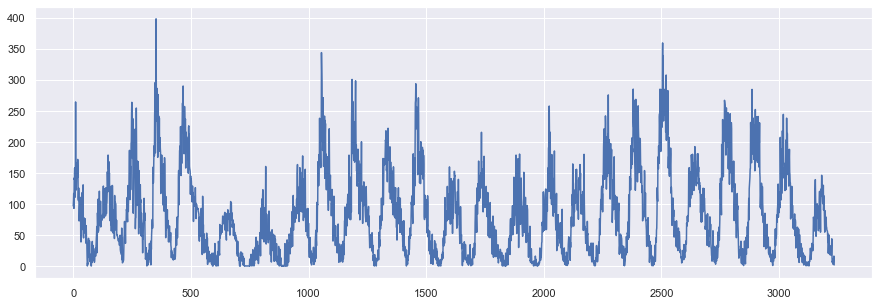

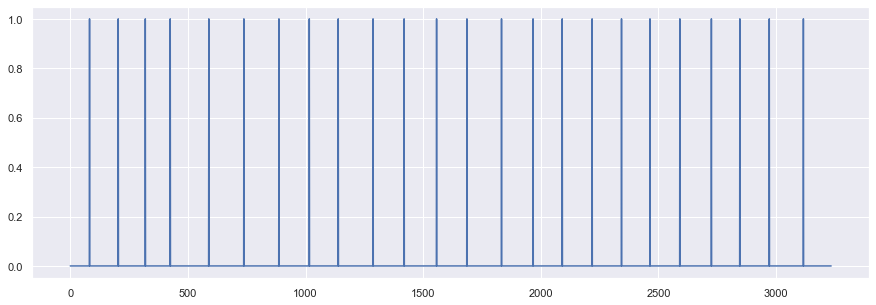

In [69]:
_df["Monthly Mean Total Sunspot Number"].plot(figsize=(15,5))
plt.show()
_df["min_flag"].plot(figsize=(15,5))
plt.show()

### frame作成

In [70]:
class CoutFrame:
    def __init__(self):
        self.framecount = 0
        self.pre_flg = 0
    
    def countFrame(self,flg):
        
        if self.pre_flg == 0 and flg:
            self.framecount = self.framecount + 1
        
        self.pre_flg = flg
        
        return self.framecount

In [71]:
countFrame = CoutFrame()

In [72]:
_df["FrameVar"] = _df["min_flag"].apply(countFrame.countFrame)

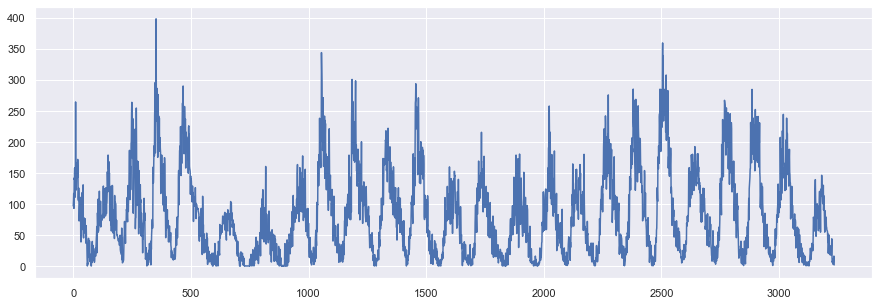

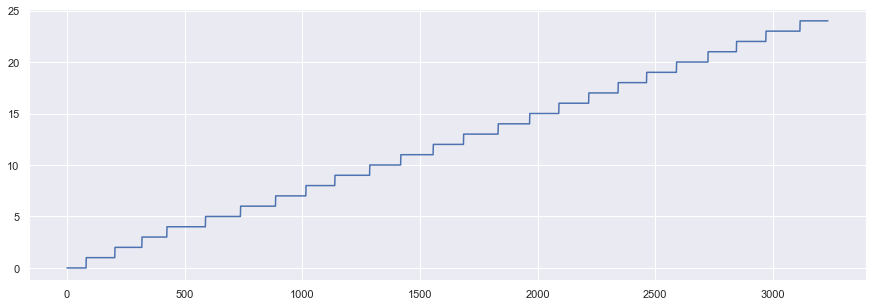

In [73]:
_df["Monthly Mean Total Sunspot Number"].plot(figsize=(15,5))
plt.show()
_df["FrameVar"].plot(figsize=(15,5))
plt.show()

In [74]:
_df.describe()

,Unnamed: 0,Monthly Mean Total Sunspot Number,ma_24,min_flag,FrameVar
count,3235.000000,3235.000000,3212.000000,3235.000000,3235.000000
mean,1617.000000,82.481082,82.544160,0.007419,12.094900
std,934.008387,67.805190,60.136318,0.085826,7.035379
min,0.000000,0.000000,0.062500,0.000000,0.000000
25%,808.500000,24.750000,30.297917,0.000000,6.000000
50%,1617.000000,68.300000,72.120833,0.000000,12.000000
75%,2425.500000,122.900000,120.072917,0.000000,18.000000
max,3234.000000,398.200000,270.633333,1.000000,24.000000


### Frame内番号をつける

In [75]:
class CountNum:
    def __init__(self):
        self.countNum = 0
        self.pre_frame = 0
    
    def countNumByFrame(self,frame):
        
        if self.pre_frame != frame:
            self.countNum = 0
            self.pre_frame = frame
        else:
            self.countNum = self.countNum + 1
            
        
        return self.countNum

In [76]:
countNum = CountNum()

In [77]:
_df["countByFrame"] = _df["FrameVar"].apply(countNum.countNumByFrame)

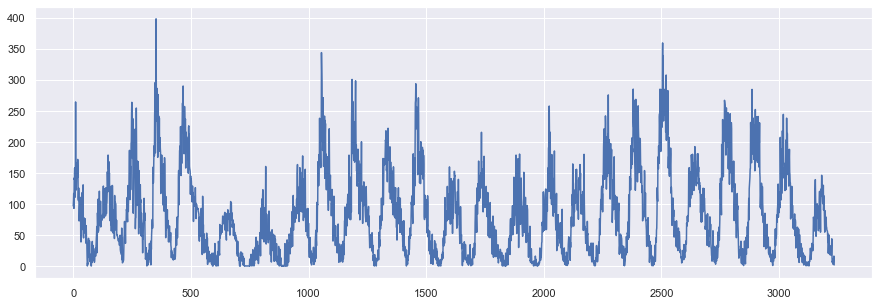

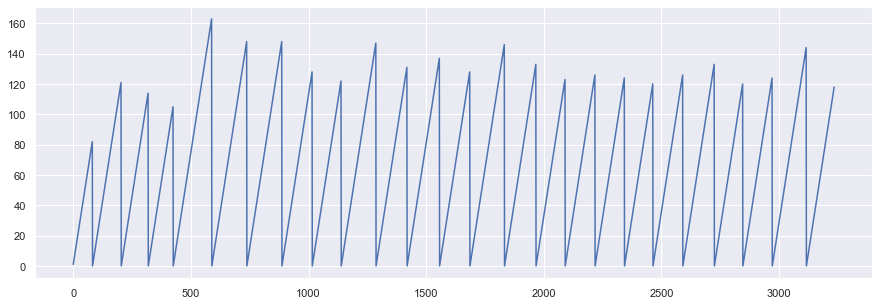

In [78]:
_df["Monthly Mean Total Sunspot Number"].plot(figsize=(15,5))
plt.show()
_df["countByFrame"].plot(figsize=(15,5))
plt.show()

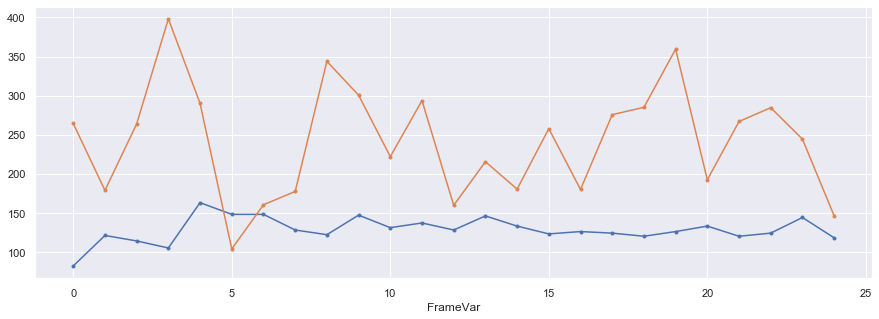

In [79]:
_df.groupby("FrameVar")["countByFrame"].max().plot(figsize=(15,5),style='.-')
_df.groupby("FrameVar")["Monthly Mean Total Sunspot Number"].max().plot(figsize=(15,5),style='.-')

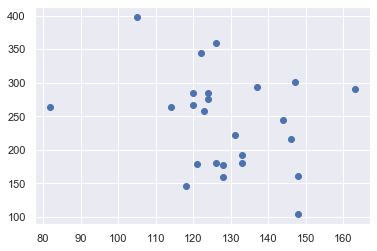

In [80]:
plt.scatter(_df.groupby("FrameVar")["countByFrame"].max(),_df.groupby("FrameVar")["Monthly Mean Total Sunspot Number"].max())

In [81]:
df_analyze = _df[["Monthly Mean Total Sunspot Number","ma_24","FrameVar","countByFrame"]].copy()

In [82]:
df_analyze = df_analyze[df_analyze["FrameVar"] != 0].copy()

In [83]:
%matplotlib inline

波形をフレームごとで比較

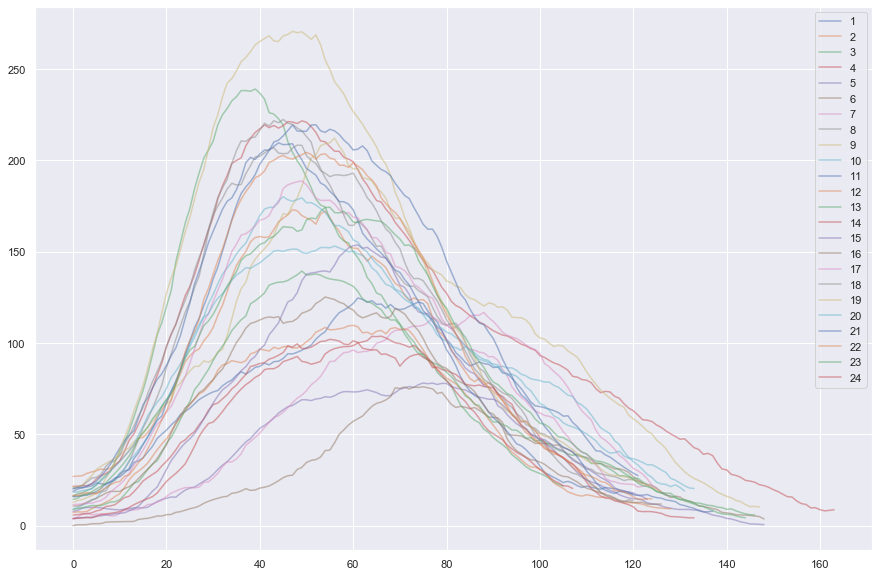

In [84]:
group = df_analyze.groupby("FrameVar")
plt.figure(figsize=(15,10))
for _name,_g in group:
    #plt.plot(_g.countByFrame,_g["Monthly Mean Total Sunspot Number"])
    plt.plot(_g.countByFrame,_g["ma_24"],label=_name,alpha=0.5)
plt.legend()

フレーム内カウントで平均、分散、最大最小値を記載

In [85]:
df_analyze_mean = df_analyze.groupby("countByFrame").agg(["mean","std","min","max"])

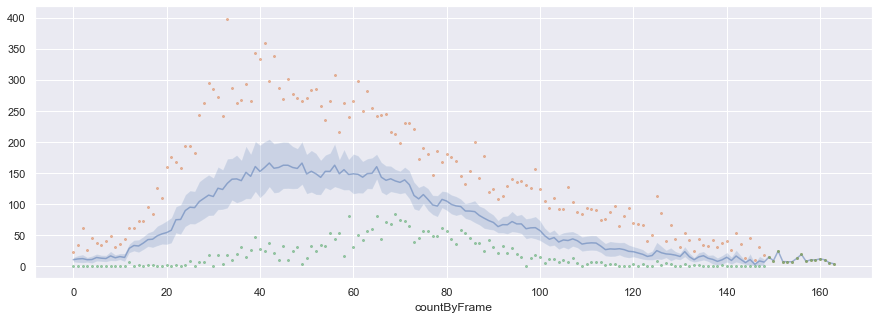

In [86]:
_colname = "Monthly Mean Total Sunspot Number"
df_analyze_mean[(_colname,"mean")].plot(figsize=(15,5),alpha=0.5)
plt.fill_between(df_analyze_mean.index, df_analyze_mean[(_colname,"mean")]-df_analyze_mean[(_colname,"std")]/2,df_analyze_mean[(_colname,"mean")]+df_analyze_mean[(_colname,"std")]/2,alpha=0.2)
df_analyze_mean[(_colname,"max")].plot(figsize=(15,5),style='.', markersize=4,alpha=0.5)
df_analyze_mean[(_colname,"min")].plot(figsize=(15,5),style='.', markersize=4,alpha=0.5)

In [90]:
_df_test = df_analyze[["ma_24","FrameVar"]].groupby("FrameVar").agg(["size","mean","std","max","min","skew"])


In [91]:
#_df_test=_df_test.reset_index(level='FrameVar',col_level=1)

KeyError: "['size'] not in index"

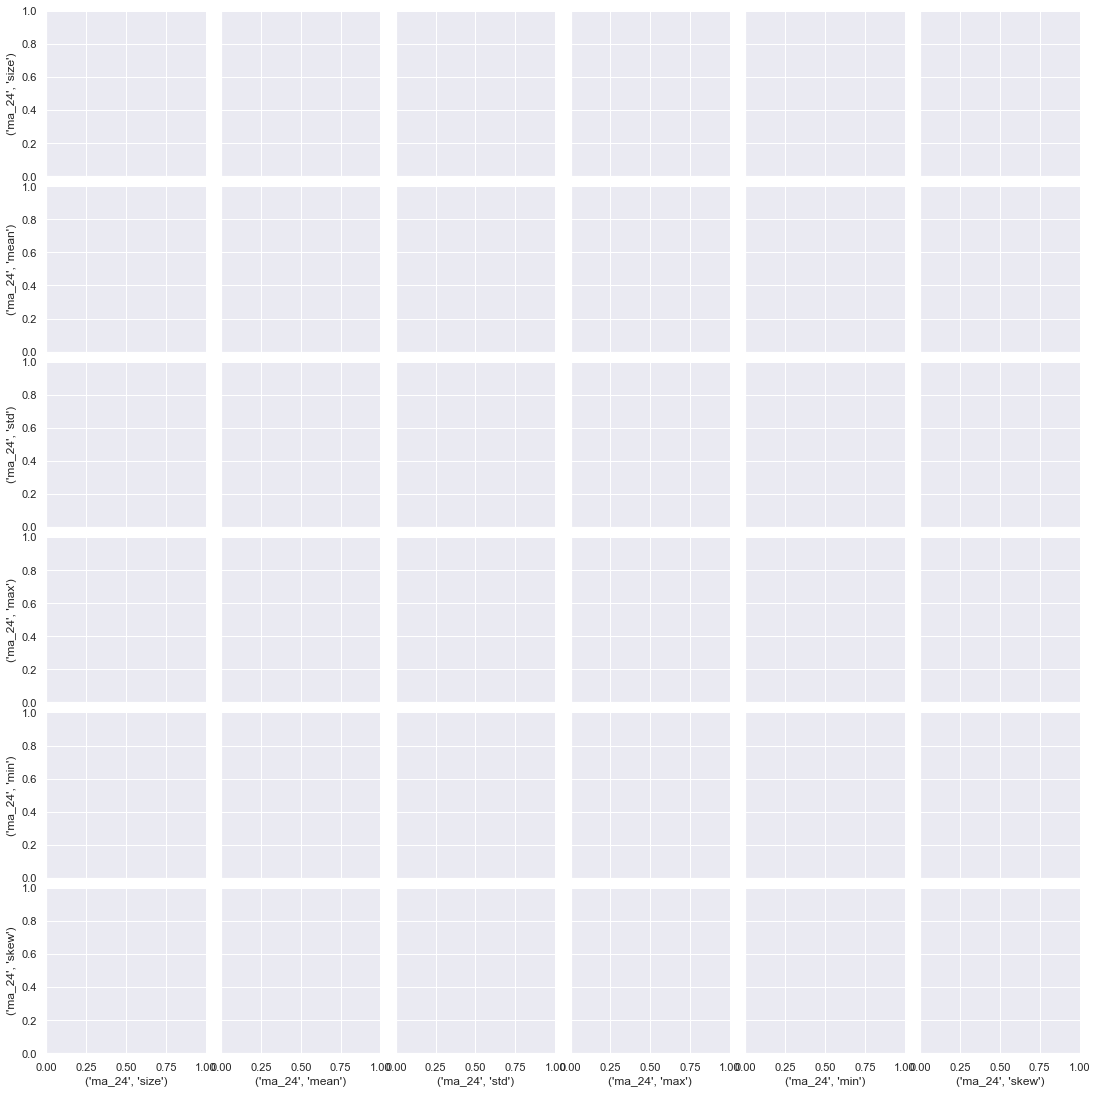

In [92]:
sns.pairplot(_df_test)

In [93]:
from sklearn.cluster import KMeans

In [94]:
model = KMeans(n_clusters=6)

In [95]:
clf = model.fit(df_analyze[["ma_24","FrameVar"]].groupby("FrameVar").agg(["mean","std","max"]))

In [96]:
clf.labels_

array([3, 0, 2, 2, 1, 1, 3, 2, 2, 0, 2, 3, 5, 3, 5, 3, 0, 2, 4, 5, 2, 2,
       0, 3])

In [97]:
_df_test["target"] = clf.labels_

KeyError: "['size'] not in index"

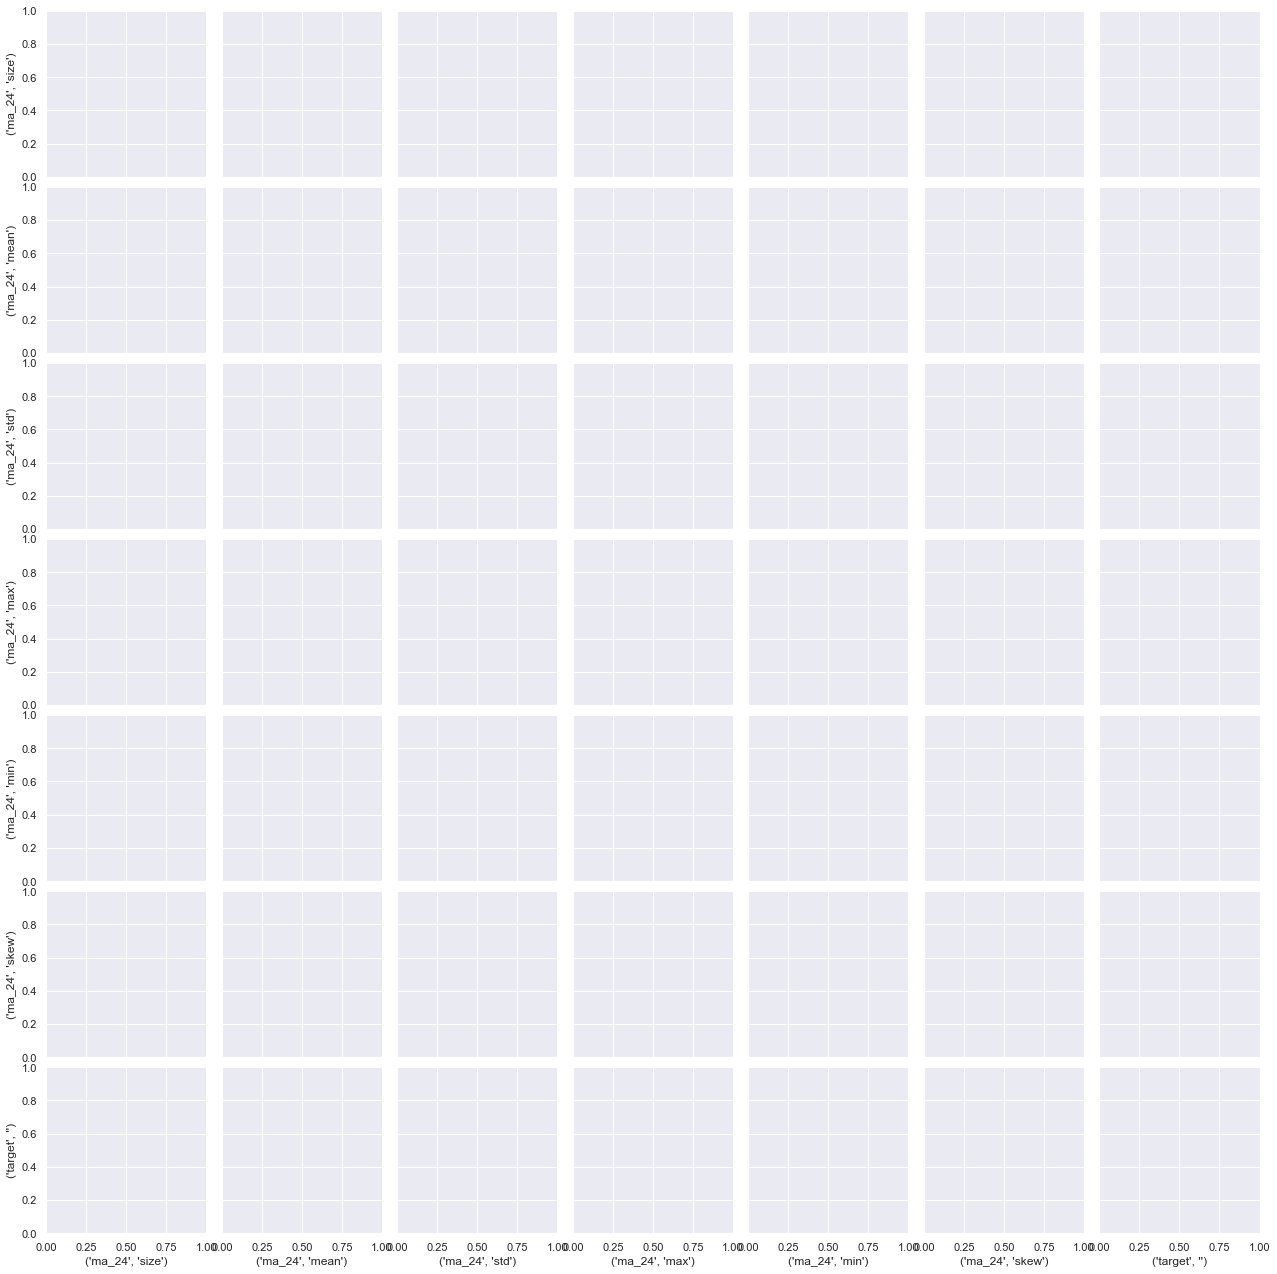

In [98]:
sns.pairplot(_df_test,hue="target")

In [99]:
_df_test[["target"]]

,target
,
FrameVar,
1,3
2,0
3,2
4,2
5,1
6,1
7,3
8,2


In [100]:
df_analyze.set_index("FrameVar",drop=True)

,Monthly Mean Total Sunspot Number,ma_24,countByFrame
FrameVar,,,
1,11.3,15.833333,0
1,33.3,16.095833,1
1,20.8,16.458333,2
1,11.8,16.729167,3
1,9.0,17.420833,4
...,...,...,...
24,2.5,NaN,114
24,8.9,NaN,115
24,13.2,NaN,116


In [101]:
df_merge = pd.merge(df_analyze,_df_test[["target"]].reset_index(),left_on="FrameVar",right_on=("FrameVar",))

C:\Users\kenji\anaconda3\lib\site-packages\pandas\core\reshape\merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
C:\Users\kenji\anaconda3\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [102]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3153 entries, 0 to 3152
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Monthly Mean Total Sunspot Number  3153 non-null   float64
 1   ma_24                              3142 non-null   float64
 2   FrameVar                           3153 non-null   int64  
 3   countByFrame                       3153 non-null   int64  
 4   (target, )                         3153 non-null   int32  
dtypes: float64(2), int32(1), int64(2)
memory usage: 135.5 KB


In [103]:
#group = df_merge.groupby("\('target', ''\)")
df_merge[('target', '')]


0       3
1       3
2       3
3       3
4       3
       ..
3148    3
3149    3
3150    3
3151    3
3152    3
Name: (target, ), Length: 3153, dtype: int32

In [104]:
_col_list = ["Monthly Mean Total Sunspot Number",
            "ma_24"]

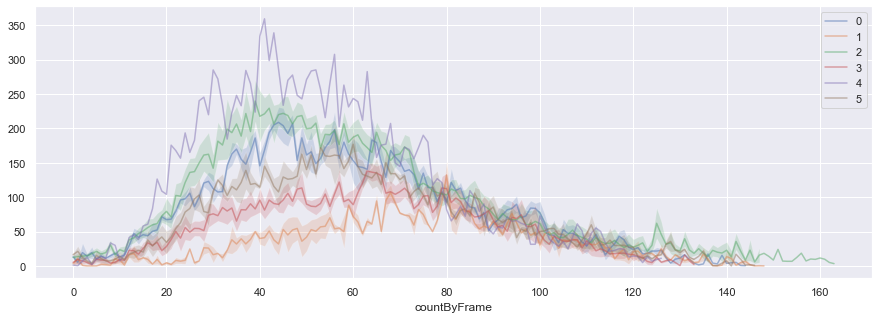

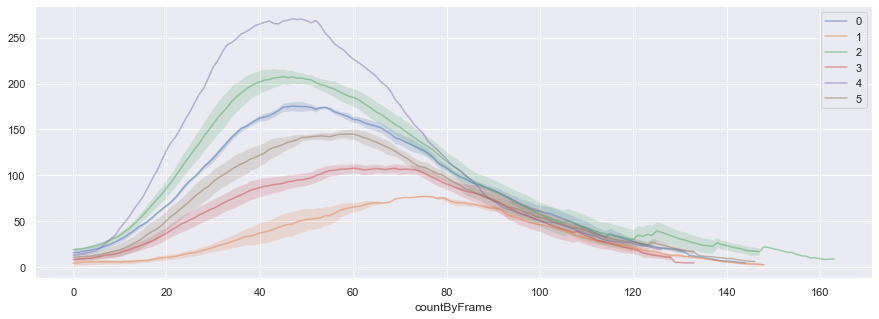

In [105]:
#_colname = "ma_24"
_colname = "Monthly Mean Total Sunspot Number"
for _colname in _col_list:
    group = df_merge.groupby([('target', '')])
    for _name,_g in group:

        df_analyze_mean = _g.groupby("countByFrame").agg(["mean","std","min","max"])
        
        df_analyze_mean[(_colname,"mean")].plot(figsize=(15,5),alpha=0.5,label=_name)
        plt.fill_between(df_analyze_mean.index, df_analyze_mean[(_colname,"mean")]-df_analyze_mean[(_colname,"std")]/2,df_analyze_mean[(_colname,"mean")]+df_analyze_mean[(_colname,"std")]/2,alpha=0.2)

        #df_analyze_mean[(_colname,"max")].plot(figsize=(15,5),style='.', markersize=4,alpha=0.5)
        #df_analyze_mean[(_colname,"min")].plot(figsize=(15,5),style='.', markersize=4,alpha=0.5)

    plt.legend()
    plt.show()